## Q 1.1
As in every good data analysis, you should start to explore the data. There is a bunch of things to look at, 
### Task 1

- Are there missing values? Look on the website of the data to see how missing values are coded.
- Compute the means and variances of the features (visualise in a histogram or with a kernel density estimate). Do they vary widely?
- Are there constant features?

In [2]:
import pandas as pd

data = pd.read_csv('TCGA-PANCAN-HiSeq-801x20531\data.csv', index_col=0)
labels = pd.read_csv('TCGA-PANCAN-HiSeq-801x20531\labels.csv', index_col=0)

In [3]:
import numpy as np

data[~data.applymap(np.isreal).all(1)]


,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530


The UCI website said "N/A" for missing values, so I presume there are no missing values. As we can see above all features in the imported data are real valued, and there are no missing labels either.

Min var: 0.0
# of features with var=0: 267
Max var: 44.76384922341962


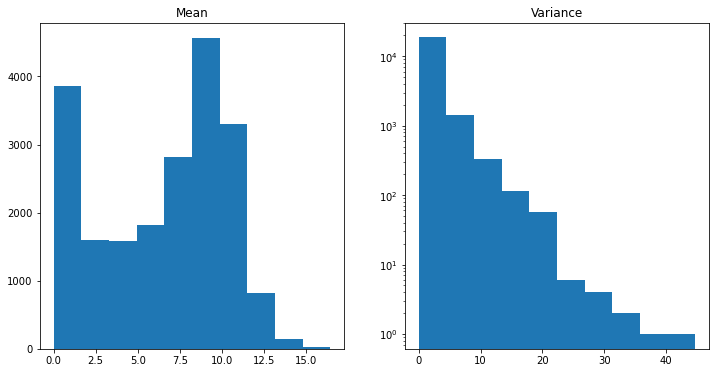

In [46]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
axs[0].hist(data.mean())
axs[0].set_title('Mean')

axs[1].hist(data.var())
axs[1].set_title('Variance')
axs[1].set_yscale('log')

print(f'Min var: {data.var().min()}')
print(f'# of features with var=0: {(data.var()==0).sum()}')
print(f'Max var: {data.var().max()}')

The means of the features vary as we see in the above plot. Most features seem to have means close to 0 or around 10. The variances are generally low, but go as high as 44.76 for the feature with the highest variance. The amount of features that exhibit high variance like this decrease exponentially with variance however, so they are quite rare comparatively. I also found 267 constant features (with 0 variance).

### Task 2
- Perform variance filtering and reduce the number of features to about 5000.
- Check the means and variances for each feature again. Is there a need to center and standardize the data?

In [67]:
#var_filtered_data = data.iloc[data.var() > 5]
#print(data.var() > 5)
variance = data.var()
columns = data.columns

variable = []
threshold = 2

for i in range(0, len(variance)):
    if variance[i] >= threshold:
        variable.append(columns[i])

print(len(variable))

var_filtered_data = data[variable]
var_filtered_data.head()

5587


,gene_18,gene_21,gene_26,gene_28,gene_29,gene_30,gene_31,gene_33,gene_39,gene_44,...,gene_20466,gene_20472,gene_20476,gene_20484,gene_20490,gene_20500,gene_20504,gene_20514,gene_20524,gene_20529
sample_0,0.591871,0.000000,7.215116,6.620204,9.513538,0.0,4.063658,4.747656,0.000000,1.010279,...,4.377061,1.010279,9.175285,2.717803,0.000000,5.902800,2.602077,7.128881,7.220030,5.286759
sample_1,0.000000,0.000000,9.949812,1.174790,4.926991,0.0,0.000000,1.327170,0.811142,2.651224,...,2.530820,0.587845,0.000000,4.516185,4.008227,1.004394,0.811142,6.047558,6.256586,2.094168
sample_2,1.683023,3.660427,6.096650,7.680507,3.119439,0.0,0.452595,0.000000,0.452595,0.000000,...,6.172313,0.000000,8.834108,6.535353,2.337254,0.000000,5.014445,6.661493,5.401607,1.683023
sample_3,1.267356,0.000000,3.913761,6.469165,7.029895,0.0,1.267356,7.742714,0.434882,1.931418,...,6.318335,0.000000,7.529188,4.466457,0.434882,5.075383,6.233192,7.613915,8.942805,3.292001
sample_4,0.889707,0.000000,1.942120,5.861429,7.755709,0.0,0.649386,2.612801,0.649386,0.000000,...,6.775999,5.370398,7.647883,0.889707,2.045093,3.954001,4.586531,6.505099,7.181162,5.110372


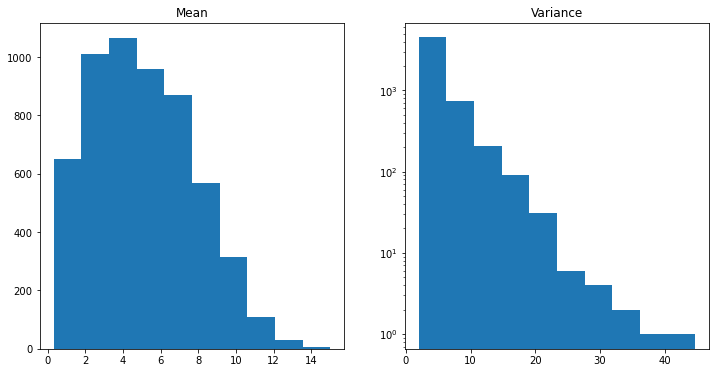

In [70]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
axs[0].hist(var_filtered_data.mean())
axs[0].set_title('Mean')

axs[1].hist(var_filtered_data.var())
axs[1].set_title('Variance')
axs[1].set_yscale('log')

### Task 3

- Perform a Principal Component Analysis on the reduced dataset and look at some pair-plots between the first few principal components.
- Are any patterns visible?
- Also look at the eigenvalues of the principal components (scree plot). Is there a potential to reduce the dimension of the dataset even more? If so, perform a dimension reduction and only work with the selected principal components. If not, work with the original dataset after variance filtering.

In [109]:
from sklearn.decomposition import PCA

pca = PCA(n_components=6) # n_components ?
principal_components = pca.fit_transform(var_filtered_data)
print(pca.explained_variance_ratio_[:6])

principalDF = pd.DataFrame(principal_components, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6'])

finalDF = pd.concat([principalDF, labels.reset_index()['Class']], axis=1)

[0.18374285 0.11468524 0.10506603 0.07249052 0.03199347 0.02712612]


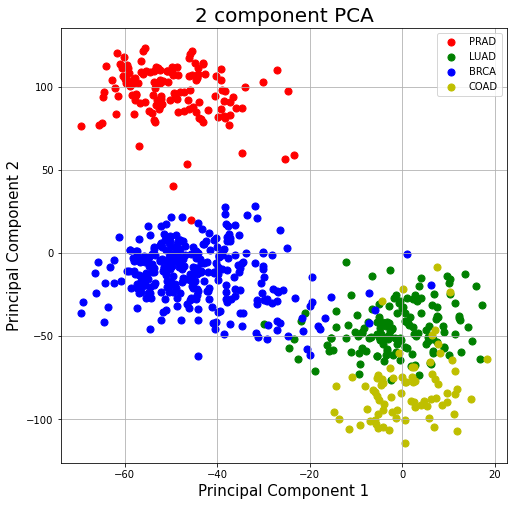

In [110]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['PRAD', 'LUAD', 'BRCA', 'COAD']
colors = ['r', 'g', 'b', 'y']
for target, color in zip(targets,colors):
    indicesToKeep = finalDF['Class'] == target
    ax.scatter(finalDF.loc[indicesToKeep, 'PC1']
               , finalDF.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()